In [1]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv("Receptes_facturades_al_Servei_Catal__de_la_Salut_20250625.csv", encoding="utf-8-sig")

# Show the first few rows
print(df.head())

/var/folders/wd/gnq83t894k1gszvkc01kq4y00000gn/T/ipykernel_5650/2582203700.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Receptes_facturades_al_Servei_Catal__de_la_Salut_20250625.csv", encoding="utf-8-sig")


    any  mes codi de la regió sanitària regió sanitària grup d'edat  sexe  \
0  2025    4                         61          LLEIDA     0-1 any  Dona   
1  2025    4                         61          LLEIDA     0-1 any  Dona   
2  2025    4                         61          LLEIDA     0-1 any  Dona   
3  2025    4                         61          LLEIDA     0-1 any  Dona   
4  2025    4                         61          LLEIDA     0-1 any  Dona   

  codi del grup ATC nivell 1                 grup ATC nivell 1  \
0                          A  TRACTO ALIMENTARIO Y METABOLISMO   
1                          A  TRACTO ALIMENTARIO Y METABOLISMO   
2                          A  TRACTO ALIMENTARIO Y METABOLISMO   
3                          A  TRACTO ALIMENTARIO Y METABOLISMO   
4                          A  TRACTO ALIMENTARIO Y METABOLISMO   

  codi del grup ATC nivell 2  \
0                        A01   
1                        A02   
2                        A07   
3           

In [2]:
df.shape


(7363661, 18)

In [3]:
# Print all column names
print(df.columns.tolist())

['any', 'mes', 'codi de la regió sanitària', 'regió sanitària', "grup d'edat", 'sexe', 'codi del grup ATC nivell 1', 'grup ATC nivell 1', 'codi del grup ATC nivell 2', 'grup ATC nivell 2', 'codi del grup ATC nivell 3', 'grup ATC nivell 3', 'codi del grup ATC nivell 4', 'grup ATC nivell 4', 'nombre de receptes', "nombre d'envasos", 'import íntegre', 'import aportació CatSalut']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7363661 entries, 0 to 7363660
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   any                         int64  
 1   mes                         int64  
 2   codi de la regió sanitària  object 
 3   regió sanitària             object 
 4   grup d'edat                 object 
 5   sexe                        object 
 6   codi del grup ATC nivell 1  object 
 7   grup ATC nivell 1           object 
 8   codi del grup ATC nivell 2  object 
 9   grup ATC nivell 2           object 
 10  codi del grup ATC nivell 3  object 
 11  grup ATC nivell 3           object 
 12  codi del grup ATC nivell 4  object 
 13  grup ATC nivell 4           object 
 14  nombre de receptes          int64  
 15  nombre d'envasos            int64  
 16  import íntegre              float64
 17  import aportació CatSalut   float64
dtypes: float64(2), int64(4), object(12)
memory usage: 1011.2+ MB


In [5]:
#region_count = df['regió sanitària'].value_counts()
#print(region_count)

df.value_counts('regió sanitària')


regió sanitària
BARCELONA                       1136197
GIRONA                          1077508
CAMP DE TARRAGONA               1026501
CATALUNYA CENTRAL                988920
LLEIDA                           916225
TERRES DE L'EBRE                 814159
ALT PIRINEU i ARAN               615762
BARCELONA METROPOLITANA NORD     179505
BARCELONA CIUTAT                 171949
BARCELONA METROPOLITANA SUD      164503
PENEDÈS                          145312
SENSE ESPECIFICAR                113925
ALTRES                            13195
Name: count, dtype: int64

In [6]:
#rename some colums to make it more easy and avoid mistakes
df.rename(columns={"any": "year"}, inplace=True)
df.rename(columns={"grup d'edat": "age"}, inplace=True)
df.rename(columns={"regió sanitària": "region"}, inplace=True)
df.rename(columns={"grup ATC nivell 4": "pill"}, inplace=True)
df.rename(columns={"sexe": "gender"}, inplace=True)
df.rename(columns={"nombre de receptes": "prescriptions_invoiced"}, inplace=True)
df.rename(columns={"import aportació CatSalut": "Admin_contribution_amount"}, inplace=True)
df.head()

,year,mes,codi de la regió sanitària,region,age,gender,codi del grup ATC nivell 1,grup ATC nivell 1,codi del grup ATC nivell 2,grup ATC nivell 2,codi del grup ATC nivell 3,grup ATC nivell 3,codi del grup ATC nivell 4,pill,prescriptions_invoiced,nombre d'envasos,import íntegre,Admin_contribution_amount
0,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A01,PREPARADOS ESTOMATOLOGICOS,A01A,PREPARADOS ESTOMATOLOGICOS,A01AB,Antiinfecciosos y antisepticos para el tratami...,15,15,42.45,26.34
1,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A02,AGENTES PARA EL TRATAMIENTO DE ALTERACIONES CA...,A02B,AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO ...,A02BC,Inhibidores de la bomba de protones,1,1,18.54,9.27
2,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07A,ANTIINFECCIOSOS INTESTINALES,A07AA,Antibioticos,1,1,4.68,2.81
3,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07C,ELECTROLITOS CON CARBOHIDRATOS,A07CA,Formulaciones de sales de rehidratacion oral,26,26,85.21,54.96
4,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A11,VITAMINAS,A11C,"VITAMINAS A Y D, INCLUYENDO COMBINACIONES DE L...",A11CC,Vitamina D y analogos,294,294,1440.06,884.57


In [7]:
age_count = df["age"].value_counts()
print(age_count)


age
Més de 84            244601
65-69                237896
70-74                236814
60-64                236527
55-59                234605
50-54                231017
75-79                230638
80-84                225862
45-49                224414
18-19 anys           223156
40-44                216941
16-17 anys           215910
65-69 anys           215884
60-64 anys           215373
70-74 anys           214942
55-59 anys           213792
75-79 anys           211713
50-54 anys           210518
45-49 anys           203734
Més de 84 anys       203368
80-84 anys           202461
35-39                202213
14-15 anys           196590
40-44 anys           194049
30-34                181858
35-39 anys           179241
12-13 anys           173078
30-34 anys           166169
25-29                162686
10-11 anys           157836
25-29 anys           153561
20-24                148851
8-9 anys             147458
20-24 anys           145870
6-7 anys             136764
4-5 anys        

In [8]:
# Filtrar las columnas necesarias para el análisis por nivel ATC 4
df_atc4 = df[["pill", "prescriptions_invoiced"]].dropna()

# Agrupar por grupo ATC de nivel 4 y sumar el número de recetas
atc4_sum = df_atc4.groupby("pill")["prescriptions_invoiced"].sum().reset_index()

# Ordenar en orden descendente para obtener los más prescritos
top10_atc4 = atc4_sum.sort_values(by="prescriptions_invoiced", ascending=False).head(10)

# Mostrar los resultados
print(top10_atc4)




                                                  pill  prescriptions_invoiced
144                     Derivados de la benzodiazepina                85073065
250                Inhibidores de la bomba de protones                75121395
242                Inhibidores de la HMG CoA reductasa                75001778
59                                            Anilidas                74921323
398                                  Sense especificar                55378864
240                Inhibidores de la ECA, monofarmacos                43418478
246  Inhibidores de la agregacion plaquetaria, hepa...                40652567
264  Inhibidores selectivos de la recaptacion de se...                37448966
168                     Derivados del acido propionico                36192809
14                Agentes beta- bloqueantes selectivos                29995886


In [9]:
# Example dictionary for translation 
translation_dict = {
    "Inhibidors de l’ECA": "Antihypertensives and angiotensin blockers",
    "Antagonistes del calci": "Vascular relaxants",
    "Antibiòtics beta-lactàmics, penicil·lines": "Antibiotics, penicillins",
    "Inhibidores de la bomba de protones": "Gastric acid reducer",
    "Antidepressius ISRS": "SSRI antidepressants",
    "Derivados de la benzodiazepina": "Benzodiazepines, sedative anxiolytics",
    "Anilidas": "Analgesic antipyretics: paracetamol and derivates",
    "Sense especificar": "Non specified",
    "Inhibidores de la ECA, monofarmacos": "Blood pressure regulators", 
    "Inhibidores de la agregacion plaquetaria": "Clot prevention drugs", 
    "Inhibidores selectivos de la recaptacion de serotonina": "Mood-enhancing antidepressants", 
    "Derivados del acido propionico": "Anti-inflammatory analgesics", 
    "Agentes beta- bloqueantes selectivos": "Heart rate reducers", 
    "Inhibidores de la HMG CoA reductasa": "Cholesterol-lowering statins",
    "Inhibidores de la agregacion plaquetaria, heparina excl.": "Preventing blood clots: heparine and derivates"
    
}

In [10]:
# Create a new column with translated names
top10_atc4["prescriptions"] = top10_atc4["pill"].map(translation_dict)

#If a pill name is not found in the dictionary, the result will be NaN.
top10_atc4["prescriptions"] = top10_atc4["pill"].map(translation_dict).fillna(top10_atc4["pill"])




In [11]:
# Export to CSV
top10_atc4.to_csv("translated_prescriptions.csv", index=False, encoding="utf-8-sig")

print("CSV file 'translated_prescriptions.csv' created successfully.")

CSV file 'translated_prescriptions.csv' created successfully.


I want the most consumed of the last year 2024: 

In [12]:
# Find the most recent year in the dataset
last_year = df["year"].max()

# Filter data for the last year
df_last_year = df[df["year"] == last_year]

# Select relevant columns and drop NaNs
df_atc4 = df_last_year[["pill", "prescriptions_invoiced"]].dropna()

# Group by pill and sum prescriptions
atc4_sum = df_atc4.groupby("pill")["prescriptions_invoiced"].sum().reset_index()

# Sort and select top 10
top10_atc4 = atc4_sum.sort_values(by="prescriptions_invoiced", ascending=False).head(10)

# Show results
print(f"Top 10 most consumed pills in {last_year}:")
print(top10_atc4)


Top 10 most consumed pills in 2025:
                                                  pill  prescriptions_invoiced
50                                            Anilidas                 3316248
116                     Derivados de la benzodiazepina                 2899673
203                Inhibidores de la HMG CoA reductasa                 2801265
210                Inhibidores de la bomba de protones                 2459971
330                                  Sense especificar                 1993813
139                     Derivados del acido propionico                 1687155
201                Inhibidores de la ECA, monofarmacos                 1649025
224  Inhibidores selectivos de la recaptacion de se...                 1506420
206  Inhibidores de la agregacion plaquetaria, hepa...                 1396099
12                Agentes beta- bloqueantes selectivos                 1299298


In [17]:
#Add the new column "transcriptions into English
top10_atc4["prescriptions"] = top10_atc4["pill"].map(translation_dict).fillna(top10_atc4["pill"])
print(top10_atc4)

                                                  pill  \
50                                            Anilidas   
116                     Derivados de la benzodiazepina   
203                Inhibidores de la HMG CoA reductasa   
210                Inhibidores de la bomba de protones   
330                                  Sense especificar   
139                     Derivados del acido propionico   
201                Inhibidores de la ECA, monofarmacos   
224  Inhibidores selectivos de la recaptacion de se...   
206  Inhibidores de la agregacion plaquetaria, hepa...   
12                Agentes beta- bloqueantes selectivos   

     prescriptions_invoiced                                      prescriptions  
50                  3316248  Analgesic antipyretics: paracetamol and derivates  
116                 2899673              Benzodiazepines, sedative anxiolytics  
203                 2801265                       Cholesterol-lowering statins  
210                 2459971          

In [18]:
#Generate the csv file
top10_atc4[["pill", "prescriptions", "prescriptions_invoiced"]].to_csv("top10_pills_2024.csv", index=False, encoding="utf-8-sig")
print("top10_pills_2024.csv saved!")

top10_pills_2024.csv saved!


NOT NECESSARY FINALLY

In [ ]:
# Add percentage column
atc4_sum["percentatge"] = (atc4_sum["prescriptions_invoiced"] / total_receptes) * 100

In [ ]:
# Sort and select top 10
top10_atc4 = atc4_sum.sort_values(by="prescriptions_invoiced", ascending=False).head(10)
print("Top 10 prescription invoiced in Catalonia")                                                                           
print(top10_atc4)


## EVOLUTION of top 10 prescriptions invoiced by year

In [19]:
# Read the CSV file into a DataFrame
df_years = pd.read_csv("Receptes_facturades_al_Servei_Catal__de_la_Salut_20250625.csv", encoding="utf-8-sig")
# Print all column names
print(df_years.columns.tolist())

/var/folders/wd/gnq83t894k1gszvkc01kq4y00000gn/T/ipykernel_5650/4187236726.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_years = pd.read_csv("Receptes_facturades_al_Servei_Catal__de_la_Salut_20250625.csv", encoding="utf-8-sig")


['any', 'mes', 'codi de la regió sanitària', 'regió sanitària', "grup d'edat", 'sexe', 'codi del grup ATC nivell 1', 'grup ATC nivell 1', 'codi del grup ATC nivell 2', 'grup ATC nivell 2', 'codi del grup ATC nivell 3', 'grup ATC nivell 3', 'codi del grup ATC nivell 4', 'grup ATC nivell 4', 'nombre de receptes', "nombre d'envasos", 'import íntegre', 'import aportació CatSalut']


In [20]:
#rename some colums to make it more easy and avoid mistakes
df_years.rename(columns={"any": "year"}, inplace=True)
df_years.rename(columns={"grup d'edat": "age"}, inplace=True)
df_years.rename(columns={"regió sanitària": "region"}, inplace=True)
df_years.rename(columns={"grup ATC nivell 4": "pill"}, inplace=True)
df_years.rename(columns={"sexe": "gender"}, inplace=True)
df_years.rename(columns={"nombre de receptes": "prescriptions_invoiced"}, inplace=True)
df_years.rename(columns={"import aportació CatSalut": "Admin_contribution_amount"}, inplace=True)
df_years.head()

,year,mes,codi de la regió sanitària,region,age,gender,codi del grup ATC nivell 1,grup ATC nivell 1,codi del grup ATC nivell 2,grup ATC nivell 2,codi del grup ATC nivell 3,grup ATC nivell 3,codi del grup ATC nivell 4,pill,prescriptions_invoiced,nombre d'envasos,import íntegre,Admin_contribution_amount
0,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A01,PREPARADOS ESTOMATOLOGICOS,A01A,PREPARADOS ESTOMATOLOGICOS,A01AB,Antiinfecciosos y antisepticos para el tratami...,15,15,42.45,26.34
1,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A02,AGENTES PARA EL TRATAMIENTO DE ALTERACIONES CA...,A02B,AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO ...,A02BC,Inhibidores de la bomba de protones,1,1,18.54,9.27
2,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07A,ANTIINFECCIOSOS INTESTINALES,A07AA,Antibioticos,1,1,4.68,2.81
3,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07C,ELECTROLITOS CON CARBOHIDRATOS,A07CA,Formulaciones de sales de rehidratacion oral,26,26,85.21,54.96
4,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A11,VITAMINAS,A11C,"VITAMINAS A Y D, INCLUYENDO COMBINACIONES DE L...",A11CC,Vitamina D y analogos,294,294,1440.06,884.57


In [21]:

# Remove data from year 2025
df_years = df_years[df_years["year"] != 2025]

In [22]:
# Example dictionary for translation 
translation_dict = {
    "Inhibidors de l’ECA": "Antihypertensives and angiotensin blockers",
    "Antagonistes del calci": "Vascular relaxants",
    "Antibiòtics beta-lactàmics, penicil·lines": "Antibiotics, penicillins",
    "Inhibidores de la bomba de protones": "Gastric acid reducer",
    "Antidepressius ISRS": "SSRI antidepressants",
    "Derivados de la benzodiazepina": "Benzodiazepines, sedative anxiolytics",
    "Anilidas": "Analgesic antipyretics: paracetamol and derivates",
    "Sense especificar": "Non specified",
    "Inhibidores de la ECA, monofarmacos": "Blood pressure regulators", 
    "Inhibidores de la agregacion plaquetaria": "Clot prevention drugs", 
    "Inhibidores selectivos de la recaptacion de serotonina": "Mood-enhancing antidepressants", 
    "Derivados del acido propionico": "Anti-inflammatory analgesics", 
    "Agentes beta- bloqueantes selectivos": "Heart rate reducers", 
    "Inhibidores de la HMG CoA reductasa": "Cholesterol-lowering statins",
    "Inhibidores de la agregacion plaquetaria, heparina excl.": "Preventing blood clots: heparine and derivates"
    
}

In [ ]:
# Add 'prescriptions' column with English translation 
# I use .map  to directly pass a function of translation to the map. Info: https://www.geeksforgeeks.org/python/python-pandas-map/
df_years["prescriptions"] = df_years["pill"].map(translation_dict).fillna(df_years["pill"])



In [23]:
# Step 1: Find top 10 pills by total prescriptions invoiced
total_prescriptions = df_years.groupby("pill")["prescriptions_invoiced"].sum().reset_index()
top10_pills = total_prescriptions.sort_values(by="prescriptions_invoiced", ascending=False).head(10)["pill"].tolist()



In [24]:
#Filter original DataFrame to keep only those top 10 pills
df_top10 = df_years[df_years["pill"].isin(top10_pills)]


In [25]:
#Group by year and pill, summing prescriptions invoiced
evolution = df_top10.groupby(["year", "pill"])["prescriptions_invoiced"].sum().reset_index()


In [26]:
#Pivot the data to have years as rows and pills as columns
evolution_pivot = evolution.pivot(index="year", columns="pill", values="prescriptions_invoiced").fillna(0)
print(evolution_pivot)


pill  Agentes beta- bloqueantes selectivos  Anilidas  \
year                                                   
2016                               2570256   6908190   
2017                               2749033   6893438   
2018                               2869483   6990069   
2019                               3048472   7349667   
2020                               3201236   7627229   
2021                               3322700   8028228   
2022                               3478568   9128430   
2023                               3638701   9258996   
2024                               3818139   9420828   

pill  Derivados de la benzodiazepina  Derivados del acido propionico  \
year                                                                   
2016                         8933057                         3685715   
2017                         8892300                         3471032   
2018                         8954014                         3475537   
2019                   

In [27]:
# Step 5: Rename columns in pivot to English for readability
evolution_pivot.rename(columns=translation_dict, inplace=True)
print(evolution_pivot)

pill  Heart rate reducers  Analgesic antipyretics: paracetamol and derivates  \
year                                                                           
2016              2570256                                            6908190   
2017              2749033                                            6893438   
2018              2869483                                            6990069   
2019              3048472                                            7349667   
2020              3201236                                            7627229   
2021              3322700                                            8028228   
2022              3478568                                            9128430   
2023              3638701                                            9258996   
2024              3818139                                            9420828   

pill  Benzodiazepines, sedative anxiolytics  Anti-inflammatory analgesics  \
year                                      

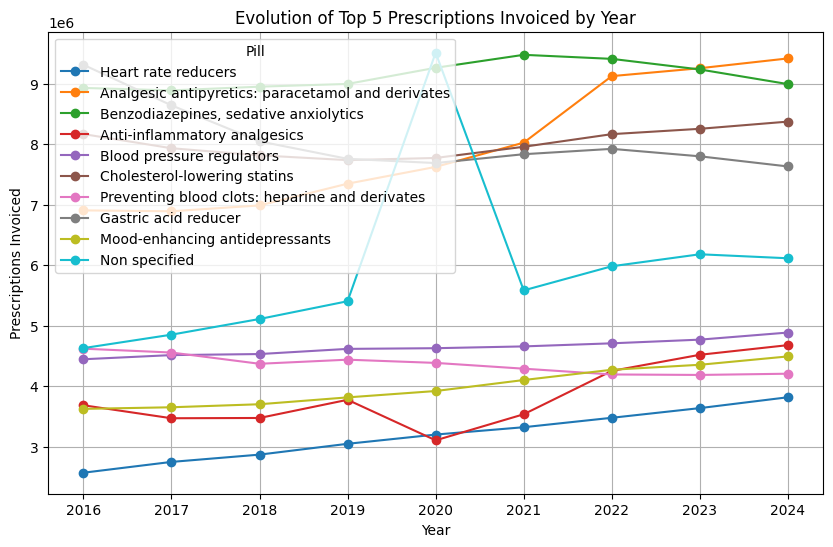

In [29]:
#Plot the evolution over years
import matplotlib.pyplot as plt

evolution_pivot.plot(marker='o', figsize=(10,6))
plt.title("Evolution of Top 5 Prescriptions Invoiced by Year")
plt.ylabel("Prescriptions Invoiced")
plt.xlabel("Year")
plt.legend(title="Pill")
plt.grid(True)
plt.show()


In [30]:
#2025 is giving me a deviation which is incomplete, so I decide to remove it adding: 

# Remove data from year 2025
#df = df[df["year"] != 2025]

In [31]:
# Save CSV
evolution_pivot.to_csv("top10_prescriptions_evolution.csv", encoding="utf-8-sig")
print("top10_prescriptions_evolution.scv saved!")


top10_prescriptions_evolution.scv saved!


## Top 10 Prescriptions invoiced by age


I am realizing that I have a problem with the age groups. They are grouped, but I need to have the same values.
So I need to remove "any" and "anys" from the cells. 

In [32]:
# Remove "any" and "anys" from the 'age' column
df["age"] = (
    df["age"]
    .str.replace(r"\banys?\b", "", case=False, regex=True)  # remove 'any' or 'anys'
    .str.strip()                                           # remove leading/trailing spaces
)

# Replace any value containing "més de" with "more than 84"
df.loc[df["age"].str.contains("més de", case=False, na=False), "age"] = "more than 84"


# Check the result
print(df["age"].unique())

['0-1' '10-11' '12-13' '14-15' '16-17' '18-19' '20-24' '2-3' '25-29'
 '30-34' '35-39' '40-44' '45-49' '4-5' '50-54' '55-59' '60-64' '65-69'
 '6-7' '70-74' '75-79' '80-84' '8-9' 'more than 84' 'Altres'
 'Sense especificar']


In [33]:
# Drop rows with missing values in key columns
df_clean = df[["pill", "age", "prescriptions_invoiced"]].dropna()



In [34]:
# Group by Age and sum prescriptions invoiced
grouped = df_clean.groupby('age')['prescriptions_invoiced'].sum().reset_index()

In [35]:
grouped

,age,prescriptions_invoiced
0,0-1,7526237
1,10-11,4352130
2,12-13,4352974
3,14-15,4690454
4,16-17,5254696
5,18-19,5292902
6,2-3,4997191
7,20-24,13931821
8,25-29,16329148
9,30-34,21833904


In [38]:
# Sort descending to get top 10
top10 = grouped.sort_values(by='prescriptions_invoiced', ascending=False).head(10)
top10

,age,prescriptions_invoiced
25,more than 84,196769486
19,70-74,163143965
20,75-79,161067982
22,80-84,145555647
18,65-69,142826410
17,60-64,121594026
15,55-59,101276722
14,50-54,80496294
13,45-49,62704599
12,40-44,46544792


In [39]:
#Also by gender

df_clean_age_gender = df[["pill", "age", "gender", "prescriptions_invoiced"]].dropna()

In [40]:
# Group by Age and sum prescriptions invoiced
grouped_age_gender = df_clean_age_gender.groupby(["age", "gender"])['prescriptions_invoiced'].sum().reset_index()
grouped_age_gender


,age,gender,prescriptions_invoiced
0,0-1,Dona,3398457
1,0-1,Home,4127780
2,10-11,Dona,1896723
3,10-11,Home,2455407
4,12-13,Dona,1886731
5,12-13,Home,2466243
6,14-15,Dona,2261277
7,14-15,Home,2429177
8,16-17,Dona,2842850
9,16-17,Home,2411846


In [ ]:
#I want to show it in a population pyramid. 
#I took the documentation from here: https://python-graph-gallery.com/web-population-pyramid/
!pip install matplotlib

In [ ]:
!pip install seaborn

In [41]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

In [42]:
import pandas as pd
import plotly.graph_objects as go

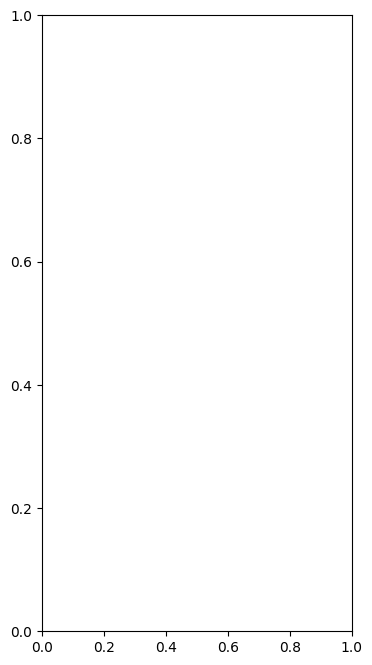

In [43]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(4, 8))

# Define the column in the dataframe that represents the groups/categories
group_col = 'gender'

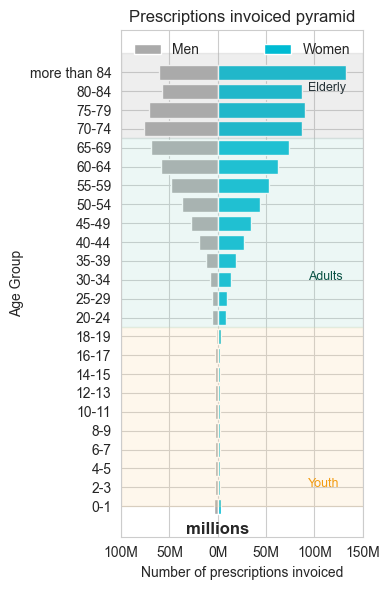

In [44]:
# Make a copy of your dataframe
df = grouped_age_gender.copy()

# Filter only relevant genders
df = df[df['gender'].isin(['Dona', 'Home'])]

# Define proper age group order
age_order = [
    '0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19',
    '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
    '60-64', '65-69', '70-74', '75-79', '80-84', 'more than 84'
]

# Keep only defined age groups and pivot the table
df = df[df['age'].isin(age_order)]
df = df.pivot(index='age', columns='gender', values='prescriptions_invoiced').fillna(0)
df = df.reindex(age_order)  # Reorder the index by age group

# Flip male values to negative for left side
df['Home'] = -df['Home']

# Load Pharmacy font
pharmacy_path = "pharmacy.ttf"  # Update this path if needed
pharmacy_font = fm.FontProperties(fname=pharmacy_path)

# Apply globally (optional)
plt.rcParams['font.family'] = pharmacy_font.get_name()

# Plotting (change the figsize in order to view it in a different size)
plt.figure(figsize=(4, 6))
sns.set_style("whitegrid")

# Plot bars
plt.barh(df.index, df['Home'], color='#aaaaaa', label='Men')
plt.barh(df.index, df['Dona'], color='#00bbd3', label='Women')

# Add legend and labels
plt.xlabel('Number of prescriptions invoiced')
plt.ylabel('Age Group')
plt.title('Prescriptions invoiced pyramid')
plt.legend(ncols=2, loc='upper center', mode="expand", frameon=False)

# 2. Add millions label at top
max_val = max(df['Dona'].max(), abs(df['Home'].min()))
plt.text(0, -1.5, "millions", ha='center', fontsize=12, fontweight='bold')

# X-axis formatting: make sure labels show as positive
xticks = plt.xticks()[0]
plt.xticks(xticks, [f"{abs(int(x))//1_000_000}M" for x in xticks])

# Highlight age ranges: youth (0–14), adults (15–65), elderly (65+)
# Map age to y-coordinate positions
y_positions = df.index.to_list()

def get_y_indices(ranges):
    return [i for i, label in enumerate(df.index) if any(label.startswith(r) or label in r for r in ranges)]

# Add shaded areas
plt.axhspan(ymin=0, ymax=9.5, color='#FAD7A1', alpha=0.2)   # Young (0-14)
plt.axhspan(ymin=9.5, ymax=19.5, color='#A2D9CE', alpha=0.2)  # Adults (15-64)
plt.axhspan(ymin=19.5, ymax=len(df), color='#aaaaaa', alpha=0.2)  # Elderly (65+)

# Calculate right margin for annotation placement
right_margin = df['Dona'].max() * 0.70  # Slightly beyond the tallest female bar

# Annotations
plt.text(right_margin, 1, "Youth", fontsize=9, color='#F39C12')
plt.text(right_margin, 12, "Adults", fontsize=9, color='#0B5345')
plt.text(right_margin, 22, "Elderly", fontsize=9, color='#253237')

plt.tight_layout()
plt.show()

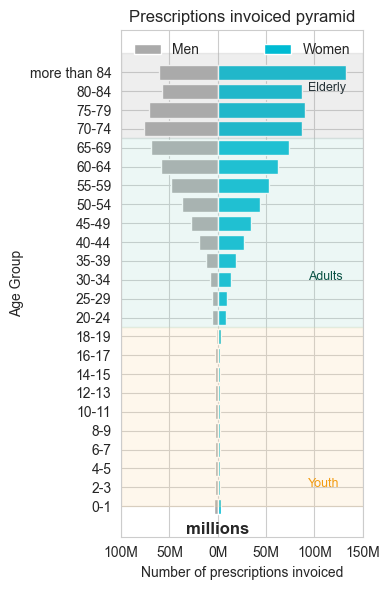

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Example data (replace this with your actual DataFrame)
# grouped_age_gender = pd.read_csv("your_data.csv")

# Make a copy of your dataframe
df = grouped_age_gender.copy()

# Filter only relevant genders
df = df[df['gender'].isin(['Dona', 'Home'])]

# Define proper age group order
age_order = [
    '0-1', '2-3', '4-5', '6-7', '8-9', '10-11', '12-13', '14-15', '16-17', '18-19',
    '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
    '60-64', '65-69', '70-74', '75-79', '80-84', 'more than 84'
]

# Keep only defined age groups and pivot the table
df = df[df['age'].isin(age_order)]
df = df.pivot(index='age', columns='gender', values='prescriptions_invoiced').fillna(0)
df = df.reindex(age_order)

# Flip male values to negative for left side
df['Home'] = -df['Home']

# Load Pharmacy font (update path as needed)
pharmacy_path = "pharmacy.ttf"
pharmacy_font = fm.FontProperties(fname=pharmacy_path)

# Apply font globally
plt.rcParams['font.family'] = pharmacy_font.get_name()

# Start plotting
plt.figure(figsize=(4, 6))
sns.set_style("whitegrid")

# Bars description
plt.barh(df.index, df['Home'], color='#aaaaaa', label='Men')
plt.barh(df.index, df['Dona'], color='#00bbd3', label='Women')

# Labels ???
plt.xlabel('Number of prescriptions invoiced')
plt.ylabel('Age Group')
plt.title('Prescriptions invoiced pyramid')
plt.legend(ncols=2, loc='upper center', mode="expand", frameon=False)

# horizontal axis formatting
xticks = plt.xticks()[0]
plt.xticks(xticks, [f"{abs(int(x))//1_000_000}M" for x in xticks])

# Add "millions" label
plt.text(0, -1.5, "millions", ha='center', fontsize=12, fontweight='bold')

# Highlight age ranges
plt.axhspan(ymin=0, ymax=9.5, color='#FAD7A1', alpha=0.2)   # Youth
plt.axhspan(ymin=9.5, ymax=19.5, color='#A2D9CE', alpha=0.2)  # Adults
plt.axhspan(ymin=19.5, ymax=len(df), color='#aaaaaa', alpha=0.2)  # Elderly

# Annotation positions an color
right_margin = df['Dona'].max() * 0.70
plt.text(right_margin, 1, "Youth", fontsize=9, color='#F39C12')
plt.text(right_margin, 12, "Adults", fontsize=9, color='#0B5345')
plt.text(right_margin, 22, "Elderly", fontsize=9, color='#253237')

plt.tight_layout()

# SAVE the figure as PNG
plt.savefig("prescriptions_pyramid.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
#df.to_csv("prescriptions_pyramid_by_age_gender.csv", encoding="utf-8-sig")


### 3. top 5 pills by region ---> MAP

In [46]:
# Read the CSV file into a DataFrame
df3 = pd.read_csv("Receptes_facturades_al_Servei_Catal__de_la_Salut_20250625.csv", encoding="utf-8-sig")

# Show the first few rows
print(df3.head())


#rename some colums to make it more easy and avoid mistakes
df3.rename(columns={"any": "year"}, inplace=True)
df3.rename(columns={"grup d'edat": "age"}, inplace=True)
df3.rename(columns={"regió sanitària": "region"}, inplace=True)
df3.rename(columns={"grup ATC nivell 4": "pill"}, inplace=True)
df3.rename(columns={"codi de la regió sanitària": "code"}, inplace=True)
df3.rename(columns={"nombre de receptes": "prescriptions_invoiced"}, inplace=True)
df3.head()



/var/folders/wd/gnq83t894k1gszvkc01kq4y00000gn/T/ipykernel_5650/3483350220.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("Receptes_facturades_al_Servei_Catal__de_la_Salut_20250625.csv", encoding="utf-8-sig")


    any  mes codi de la regió sanitària regió sanitària grup d'edat  sexe  \
0  2025    4                         61          LLEIDA     0-1 any  Dona   
1  2025    4                         61          LLEIDA     0-1 any  Dona   
2  2025    4                         61          LLEIDA     0-1 any  Dona   
3  2025    4                         61          LLEIDA     0-1 any  Dona   
4  2025    4                         61          LLEIDA     0-1 any  Dona   

  codi del grup ATC nivell 1                 grup ATC nivell 1  \
0                          A  TRACTO ALIMENTARIO Y METABOLISMO   
1                          A  TRACTO ALIMENTARIO Y METABOLISMO   
2                          A  TRACTO ALIMENTARIO Y METABOLISMO   
3                          A  TRACTO ALIMENTARIO Y METABOLISMO   
4                          A  TRACTO ALIMENTARIO Y METABOLISMO   

  codi del grup ATC nivell 2  \
0                        A01   
1                        A02   
2                        A07   
3           

,year,mes,code,region,age,sexe,codi del grup ATC nivell 1,grup ATC nivell 1,codi del grup ATC nivell 2,grup ATC nivell 2,codi del grup ATC nivell 3,grup ATC nivell 3,codi del grup ATC nivell 4,pill,prescriptions_invoiced,nombre d'envasos,import íntegre,import aportació CatSalut
0,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A01,PREPARADOS ESTOMATOLOGICOS,A01A,PREPARADOS ESTOMATOLOGICOS,A01AB,Antiinfecciosos y antisepticos para el tratami...,15,15,42.45,26.34
1,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A02,AGENTES PARA EL TRATAMIENTO DE ALTERACIONES CA...,A02B,AGENTES CONTRA LA ULCERA PEPTICA Y EL REFLUJO ...,A02BC,Inhibidores de la bomba de protones,1,1,18.54,9.27
2,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07A,ANTIINFECCIOSOS INTESTINALES,A07AA,Antibioticos,1,1,4.68,2.81
3,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A07,"ANTIDIARREICOS, AGENTES ANTIINFLAMATORIOS/ANTI...",A07C,ELECTROLITOS CON CARBOHIDRATOS,A07CA,Formulaciones de sales de rehidratacion oral,26,26,85.21,54.96
4,2025,4,61,LLEIDA,0-1 any,Dona,A,TRACTO ALIMENTARIO Y METABOLISMO,A11,VITAMINAS,A11C,"VITAMINAS A Y D, INCLUYENDO COMBINACIONES DE L...",A11CC,Vitamina D y analogos,294,294,1440.06,884.57


In [47]:


#Grouped_region=df_region.groupby('region')
#print(Grouped_region.groups)

In [48]:
df_region = df3[["pill", "region", "code", "prescriptions_invoiced"]].dropna()

In [49]:
df_region.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7363661 entries, 0 to 7363660
Data columns (total 4 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   pill                    object
 1   region                  object
 2   code                    object
 3   prescriptions_invoiced  int64 
dtypes: int64(1), object(3)
memory usage: 224.7+ MB


In [50]:
df_region['code'] = df_region['code'].replace({'AL': 0, 'SE': 1})
df_region['code'] = df_region['code'].astype(int)

In [ ]:
#AL means that the 'code' column contains non-numeric strings, like 'AL', which cannot be converted to integers using int().
#In deed, AL means "another region", so I am going to convert it first to 0. And then...convert all column to numeric

In [51]:
print(df_region['code'].dtype)

int64


In [52]:
df_region.value_counts('region')

region
BARCELONA                       1136197
GIRONA                          1077508
CAMP DE TARRAGONA               1026501
CATALUNYA CENTRAL                988920
LLEIDA                           916225
TERRES DE L'EBRE                 814159
ALT PIRINEU i ARAN               615762
BARCELONA METROPOLITANA NORD     179505
BARCELONA CIUTAT                 171949
BARCELONA METROPOLITANA SUD      164503
PENEDÈS                          145312
SENSE ESPECIFICAR                113925
ALTRES                            13195
Name: count, dtype: int64

In [53]:


# Group by region and pill, codi, sum prescriptions
grouped_byregion = (
    df_region.groupby(["region", "pill"])["prescriptions_invoiced"]
    .sum()
    .reset_index()
)

# For each region, get top 5 prescriptions
top1_region = (
    grouped_byregion
    .sort_values(["region", "prescriptions_invoiced"], ascending=[True, False])
    .groupby("region")
    .head(1)
    .reset_index(drop=True)
)
# Display the result
print(top1_region)

                          region                            pill  \
0             ALT PIRINEU i ARAN  Derivados de la benzodiazepina   
1                         ALTRES  Derivados del acido propionico   
2                      BARCELONA  Derivados de la benzodiazepina   
3               BARCELONA CIUTAT                        Anilidas   
4   BARCELONA METROPOLITANA NORD                        Anilidas   
5    BARCELONA METROPOLITANA SUD                        Anilidas   
6              CAMP DE TARRAGONA  Derivados de la benzodiazepina   
7              CATALUNYA CENTRAL  Derivados de la benzodiazepina   
8                         GIRONA  Derivados de la benzodiazepina   
9                         LLEIDA  Derivados de la benzodiazepina   
10                       PENEDÈS  Derivados de la benzodiazepina   
11             SENSE ESPECIFICAR  Derivados de la benzodiazepina   
12              TERRES DE L'EBRE  Derivados de la benzodiazepina   

    prescriptions_invoiced  
0                 

In [56]:


# Include 'codi' in the groupby
grouped_byregion = (
    df_code.groupby(["region", "pill", "code"])["prescriptions_invoiced"]
    .sum()
    .reset_index()
)

# For each region, get top prescriptions
top1_region = (
    grouped_byregion
    .sort_values(["region", "prescriptions_invoiced"], ascending=[True, False])
    .groupby("region")
    .head(1)
    .reset_index(drop=True)
)

# Display the result
print(top1_region)


NameError: name 'df_code' is not defined

In [57]:
#it gives me an error!!!

# Converts the dataframe into str object with formatting
print(top1_region.to_markdown())

|    | region                       | pill                           |   prescriptions_invoiced |
|---:|:-----------------------------|:-------------------------------|-------------------------:|
|  0 | ALT PIRINEU i ARAN           | Derivados de la benzodiazepina |                   836773 |
|  1 | ALTRES                       | Derivados del acido propionico |                    18271 |
|  2 | BARCELONA                    | Derivados de la benzodiazepina |                 46213949 |
|  3 | BARCELONA CIUTAT             | Anilidas                       |                  2500289 |
|  4 | BARCELONA METROPOLITANA NORD | Anilidas                       |                  3575831 |
|  5 | BARCELONA METROPOLITANA SUD  | Anilidas                       |                  1986139 |
|  6 | CAMP DE TARRAGONA            | Derivados de la benzodiazepina |                  6735964 |
|  7 | CATALUNYA CENTRAL            | Derivados de la benzodiazepina |                  7158885 |
|  8 | GIRONA       

In [60]:
top1_region.to_csv("top_region_pills.csv", index=False)
print("top_region_pills.csv saved!")

top_region_pills.csv saved!


In [ ]:
# COLOR PALETTE https://www.color-hex.com/color-palette/39533